<a href="https://colab.research.google.com/github/Mahima2208/Predicting-the-Discount-Price-of-Myntra/blob/main/How_to_Predict_the_Discount_Price_of_Myntra%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
color = sns.color_palette()
from wordcloud import WordCloud,STOPWORDS
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
myntra_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analytics Vidhya/Myntra Fasion Clothing.csv")

In [4]:
myntra_df.head(5)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [5]:
myntra_df.tail(5)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
526559,https://www.myntra.com/sweaters/hm/hm-women-be...,16929990,H&M,Western,sweaters,Women,hm women beige oversized cashmere jumper,NaN,9999.0,NaN,"XS, S, M, L",NaN,NaN
526560,https://www.myntra.com/jackets/hm/hm-women-bla...,16026012,H&M,Western,jackets,Women,hm women black water repellent parka jacket,NaN,9999.0,NaN,"XS, S, M, L, XL",NaN,NaN
526561,https://www.myntra.com/dresses/250-designs/250...,17654114,250 DESIGNS,Western,dresses,Women,250 designs blue lace sheath dress,NaN,9999.0,NaN,"S, M, L, XL, XXL",NaN,NaN
526562,https://www.myntra.com/dresses/masaba/masaba-w...,12508700,Masaba,Western,dresses,Women,masaba women yellow printed a line dress,NaN,9999.0,NaN,"XS, S, M, L, XL",NaN,NaN
526563,https://www.myntra.com/tshirts/jockey/jockey-w...,17856544,Jockey,Western,tshirts,Women,jockey women blue extended sleeves t shirt,NaN,799.0,NaN,"S, M, L",NaN,NaN


In [6]:
myntra_df.shape

(526564, 13)

In [7]:
myntra_df.describe(include="all")

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
count,526564,5.265640e+05,526564,526564,526564,526564,526564,333406.000000,526564.000000,452258,526564,190412.000000,190412.000000
unique,526564,NaN,2088,8,92,2,429766,NaN,NaN,1418,3588,NaN,NaN
top,https://www.myntra.com/jeans/roadster/roadster...,NaN,Pothys,Indian Wear,tshirts,Women,kanvin women pack of 2 printed pure cotton lou...,NaN,NaN,50% OFF,"S, M, L, XL, XXL",NaN,NaN
freq,1,NaN,16005,145845,61198,339185,546,NaN,NaN,52737,84643,NaN,NaN
mean,NaN,1.506939e+07,NaN,NaN,NaN,NaN,NaN,1237.444401,2414.068615,NaN,NaN,4.094892,61.990820
std,NaN,3.225710e+06,NaN,NaN,NaN,NaN,NaN,1052.063517,1916.962914,NaN,NaN,0.494158,125.714537
min,NaN,2.739900e+04,NaN,NaN,NaN,NaN,NaN,127.000000,99.000000,NaN,NaN,1.000000,0.000000
25%,NaN,1.388053e+07,NaN,NaN,NaN,NaN,NaN,659.000000,1299.000000,NaN,NaN,3.900000,8.000000
50%,NaN,1.597106e+07,NaN,NaN,NaN,NaN,NaN,952.000000,1999.000000,NaN,NaN,4.200000,18.000000
75%,NaN,1.734741e+07,NaN,NaN,NaN,NaN,NaN,1469.000000,2899.000000,NaN,NaN,4.400000,52.000000


In [8]:
myntra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [9]:
duplicate = myntra_df[myntra_df.duplicated()]
duplicate

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews


In [10]:
myntra_df.isnull().sum()


URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [11]:
# how many total missing values do we have?
null_values_count= myntra_df.isnull().sum()


total_cells = np.product(myntra_df.shape)
total_null_values = null_values_count.sum()

# percent of data that is missing
(total_null_values/total_cells) * 100

13.728596363185892

In [12]:
myntra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [13]:
myntra_df['DiscountOffer'] = myntra_df['DiscountOffer'].fillna(0)
myntra_df['DiscountOffer'] = myntra_df['DiscountOffer'].astype(str)

In [14]:

myntra_df['DiscountOffer']=myntra_df['DiscountOffer'].apply(lambda x: x.split('%')[0])


In [15]:

# Function to calculate the percentage
def calculate_percentage(discount, original_price):
    return round((discount / original_price) * 100, 2)

# Update the DataFrame with the calculated percentages
for index, row in myntra_df.iterrows():
    discount_offer = str(row['DiscountOffer'])
    if 'Rs.' in discount_offer and 'OFF' in discount_offer:
        discount = float(discount_offer.replace('Rs.', '').replace('OFF', '').strip())
        percentage = calculate_percentage(discount, row['OriginalPrice (in Rs)'])
        myntra_df.at[index, 'DiscountOffer'] = percentage


In [31]:
myntra_df['DiscountOffer'].unique()

array([45.  , 55.  , 31.  , ..., 29.29, 31.93, 43.04])

In [17]:
myntra_df.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
dtype: object

In [18]:
myntra_df['DiscountOffer']=myntra_df['DiscountOffer'].astype('float')

In [19]:
def discountPrice(Original_Price, Discount_Offer):
  return ((Original_Price*Discount_Offer)/100)
  

In [20]:
for index, row in myntra_df.iterrows():
    if np.isnan(row['DiscountPrice (in Rs)']):
        discounted_price = discountPrice(row['OriginalPrice (in Rs)'], float(row['DiscountOffer']))
        myntra_df.at[index, 'DiscountPrice (in Rs)'] = discounted_price

In [21]:
myntra_df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)         0
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [22]:
myntra_df['Ratings'] = myntra_df['Ratings'].fillna(myntra_df['Ratings'].mean())
myntra_df['Reviews'] = myntra_df['Reviews'].fillna(myntra_df['Reviews'].mean())

In [23]:

myntra_df.isnull().sum()

URL                      0
Product_id               0
BrandName                0
Category                 0
Individual_category      0
category_by_Gender       0
Description              0
DiscountPrice (in Rs)    0
OriginalPrice (in Rs)    0
DiscountOffer            0
SizeOption               0
Ratings                  0
Reviews                  0
dtype: int64

In [24]:
myntra_df.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer            float64
SizeOption                object
Ratings                  float64
Reviews                  float64
dtype: object

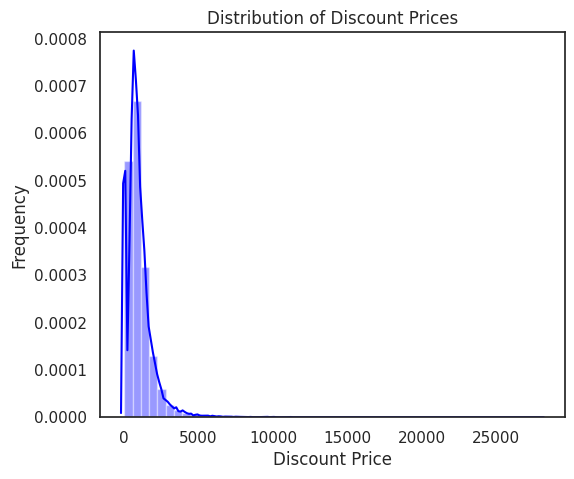

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.distplot(myntra_df['DiscountPrice (in Rs)'],color='blue')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Prices')
plt.show()


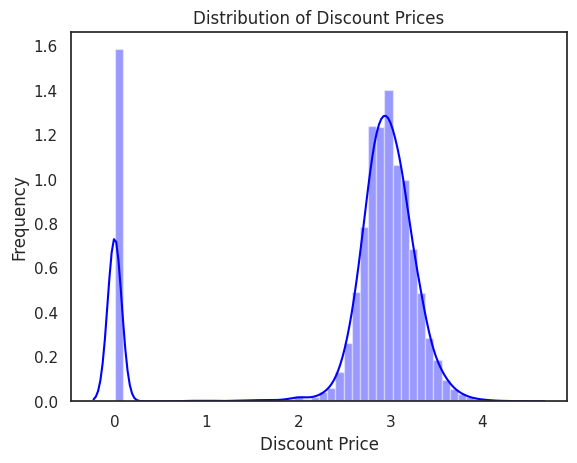

In [40]:
sns.distplot(np.log10(1+myntra_df['DiscountPrice (in Rs)']),color='blue')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Prices')
plt.show()

In [38]:
# Printing average discount rate
average_discount = myntra_df['DiscountOffer'].mean()
print("Average Discount: ", average_discount)


Average Discount:  41.981653702114066


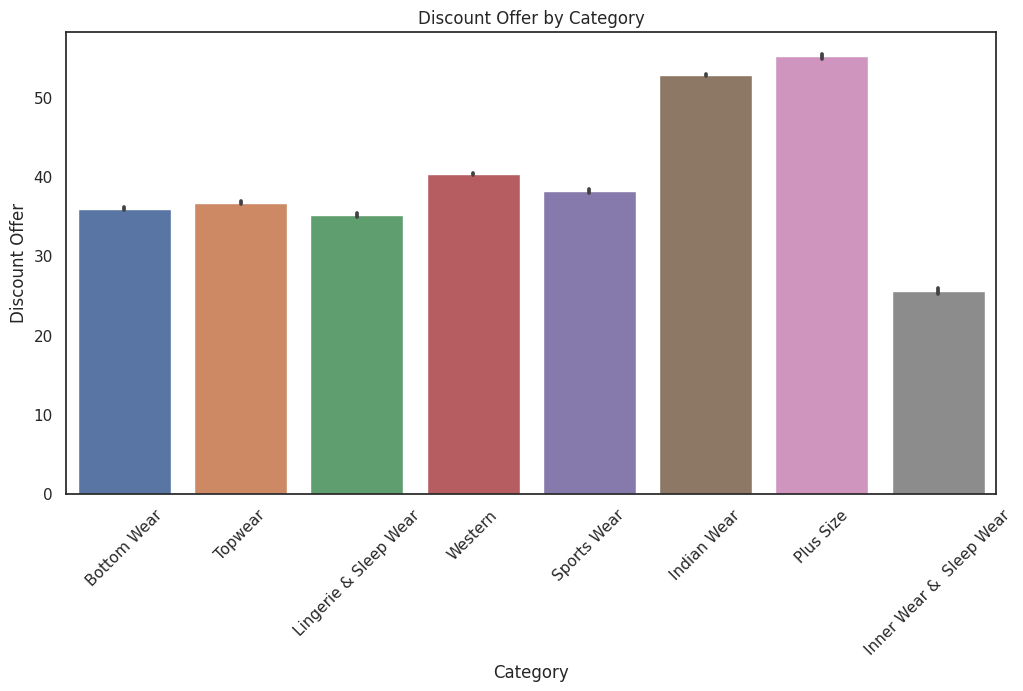

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting bar chart for Category with respect to DiscountOffer
plt.figure(figsize=(12, 6))
sns.barplot(data=myntra_df, x='Category', y='DiscountOffer')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Discount Offer')
plt.title('Discount Offer by Category')
plt.show()


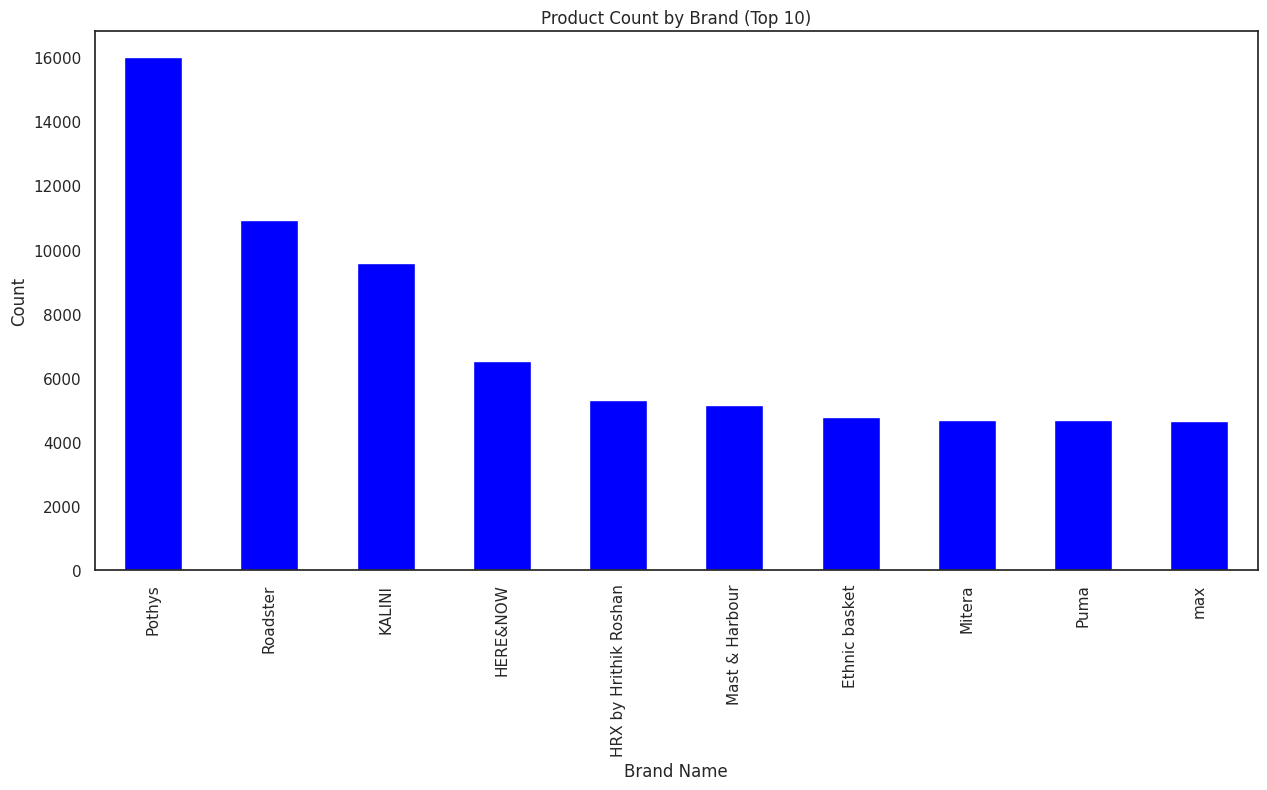

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Counting the occurrences of each brand
brand_name_count = myntra_df['BrandName'].value_counts()

# Selecting the top 10 brands
top_10_brands = brand_name_count[:10]

# Setting the plot style
sns.set_theme(style="white")

# Creating the bar plot
plt.figure(figsize=(15, 7))
top_10_brands.plot(kind='bar', color='#0000FF')
plt.xticks(rotation=90)
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Product Count by Brand (Top 10)')
plt.show()


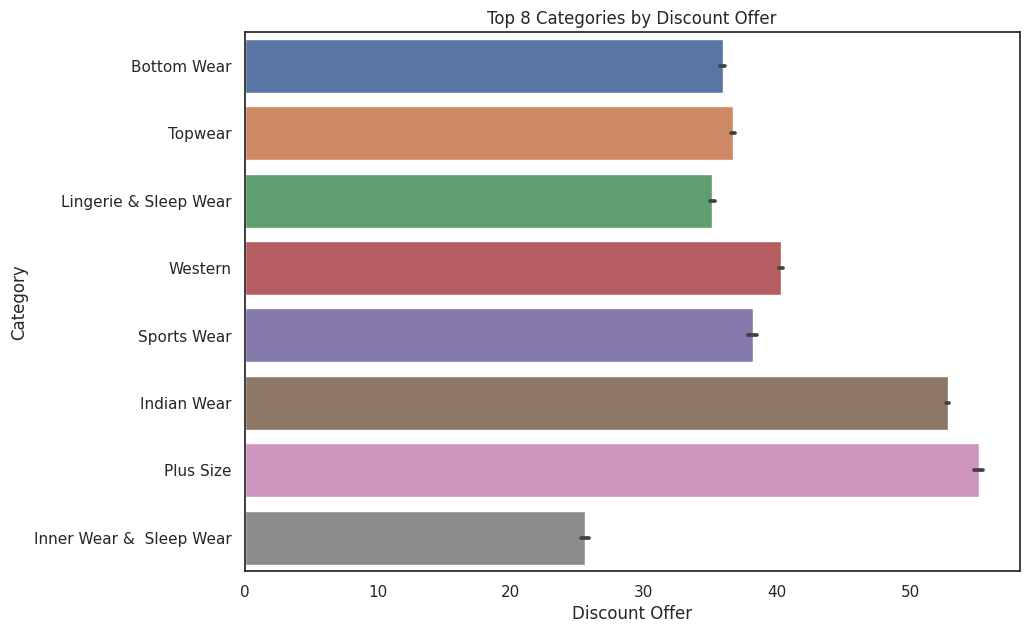

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the top 8 categories based on count of occurrences
top_8_categories = myntra_df['Category'].value_counts().head(8).index

# Filtering the dataset for the top 8 categories
filtered_df = myntra_df[myntra_df['Category'].isin(top_8_categories)]

# Plotting the bar chart
plt.figure(figsize=(10, 7))
sns.barplot(x=filtered_df['DiscountOffer'], y=filtered_df['Category'])
plt.xlabel('Discount Offer')
plt.ylabel('Category')
plt.title('Top 8 Categories by Discount Offer')
plt.show()


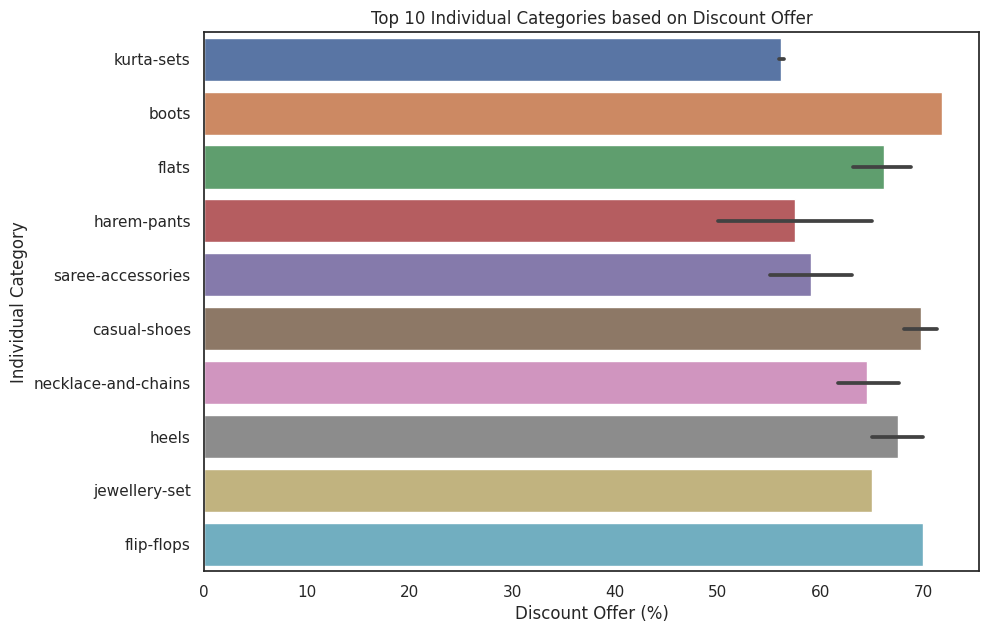

In [60]:
# Selecting the top 10 individual categories based on discount offer
top_10_categories = myntra_df.groupby('Individual_category')['DiscountOffer'].mean().nlargest(10).index

# Filtering the dataset for the top 10 categories
filtered_dataset = myntra_df[myntra_df['Individual_category'].isin(top_10_categories)]

# Creating the bar plot for top 10 individual categories based on discount offer
plt.figure(figsize=(10, 7))
sns.barplot(x=filtered_dataset['DiscountOffer'], y=filtered_dataset['Individual_category'], estimator=np.mean)
plt.xlabel('Discount Offer (%)')
plt.ylabel('Individual Category')
plt.title('Top 10 Individual Categories based on Discount Offer')
plt.show()


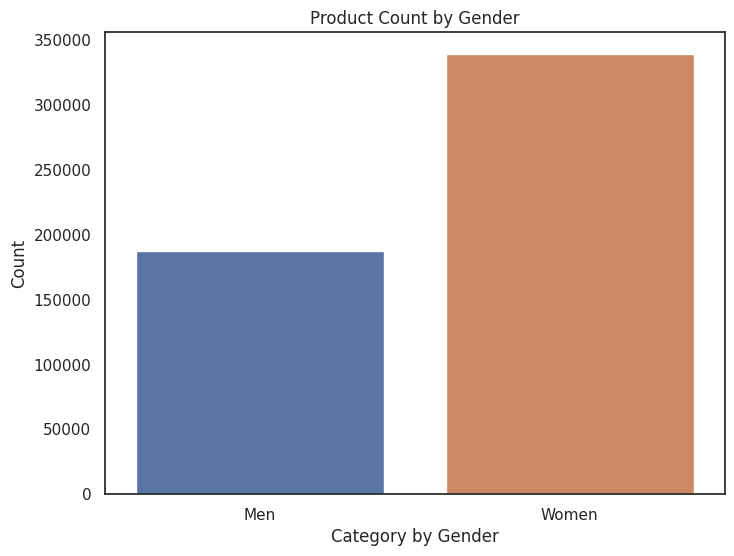

In [29]:
# Plotting bar chart for category_by_Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=myntra_df, x='category_by_Gender')
plt.xlabel('Category by Gender')
plt.ylabel('Count')
plt.title('Product Count by Gender')
plt.show()


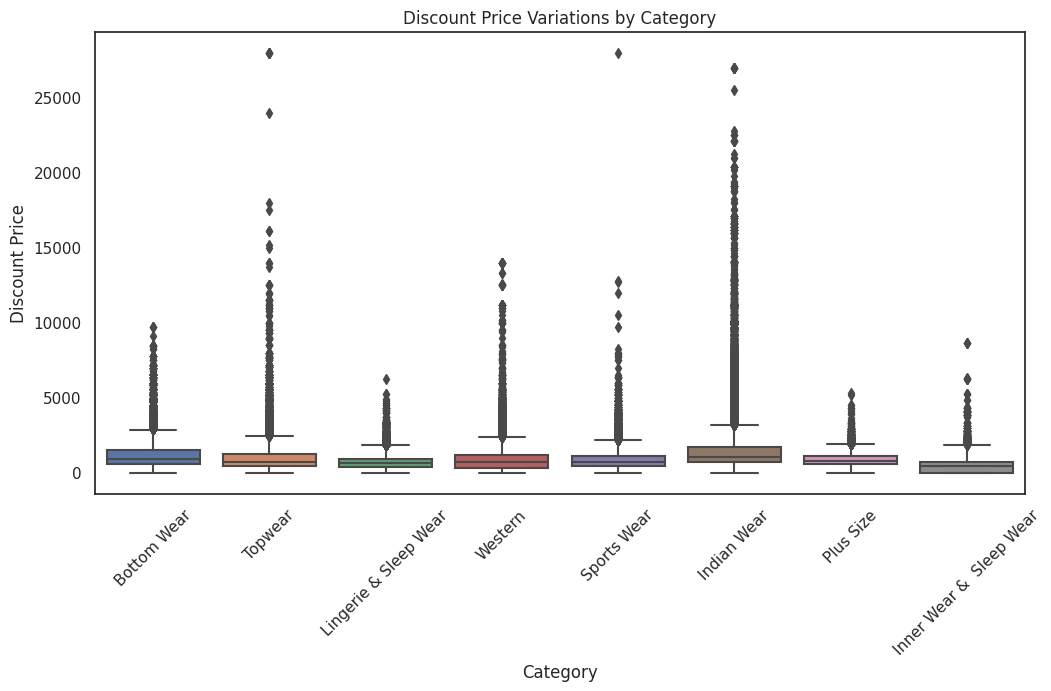

In [52]:
# Box plot for DiscountPrice by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=myntra_df, x='Category', y='DiscountPrice (in Rs)')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Discount Price')
plt.title('Discount Price Variations by Category')
plt.show()


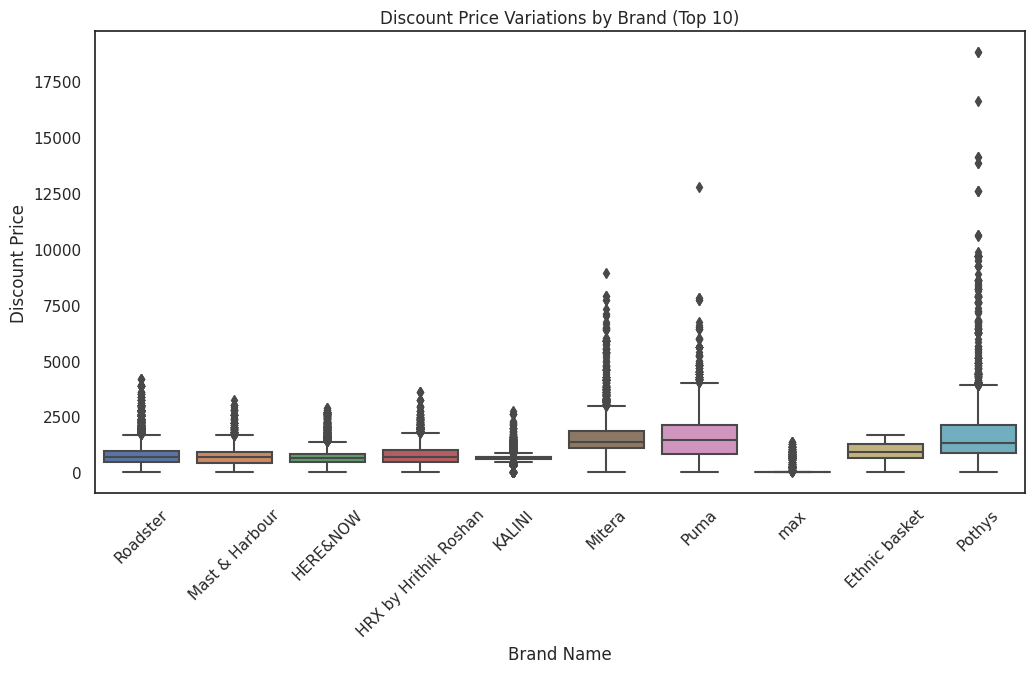

In [55]:

# Selecting the first 10 brands
top_10_brands = myntra_df['BrandName'].value_counts().head(10).index

# Filtering the dataset for the top 10 brands
filtered_dataset = myntra_df[myntra_df['BrandName'].isin(top_10_brands)]

# Box plot for DiscountPrice by BrandName (Top 10 brands)
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_dataset, x='BrandName', y='DiscountPrice (in Rs)')
plt.xticks(rotation=45)
plt.xlabel('Brand Name')
plt.ylabel('Discount Price')
plt.title('Discount Price Variations by Brand (Top 10)')
plt.show()
